Importing Libraries

In [311]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.lines as mlines

In [312]:
#defining column names for the dataframes
column_names = ["HCHO reading", "Location", "Current_date", "Next_date"]
dfs = []
filenames = ['col_mat_nuw_output.csv', 'kan_output.csv', 'mon_kur_jaf_output.csv']  # Add all your filenames here

# reading the data files and concactenate them into one dataframe
for filename in filenames:

    df = pd.read_csv(filename, names = column_names)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

# cleaning the data
df.loc[df["Location"] == "Colombo Proper", "Location"] = "Colombo"
df.loc[df["Location"] == "Deniyaya, Matara","Location"] = "Matara"
df.loc[df["Location"] == "Nuwara Eliya Proper","Location"] = "Nuwara Eliya"
df.loc[df["Location"] == "Bibile, Monaragala","Location"] = "Monaragala"
df.loc[df["Location"] == "Kurunegala Proper","Location"] = "Kurunegala"
df.loc[df["Location"] == "Jaffna Proper","Location"] = "Jaffna"
df.loc[df["Location"] == "Kandy Proper","Location"] = "Kandy"
print(df)

       HCHO reading Location Current_date   Next_date
0          0.000197  Colombo   2019-01-01  2019-01-02
1          0.000263  Colombo   2019-01-02  2019-01-03
2          0.000099  Colombo   2019-01-03  2019-01-04
3          0.000210  Colombo   2019-01-04  2019-01-05
4          0.000179  Colombo   2019-01-05  2019-01-06
...             ...      ...          ...         ...
12777           NaN   Jaffna   2023-12-27  2023-12-28
12778      0.000051   Jaffna   2023-12-28  2023-12-29
12779      0.000127   Jaffna   2023-12-29  2023-12-30
12780      0.000117   Jaffna   2023-12-30  2023-12-31
12781      0.000065   Jaffna   2023-12-31  2024-01-01

[12782 rows x 4 columns]


In [313]:
print(df.isna().sum()) # checking for missing values

HCHO reading    4864
Location           0
Current_date       0
Next_date          0
dtype: int64


In [314]:
df.loc[df['HCHO reading'] < 0 , 'HCHO reading'] = np.nan
print(df[df["HCHO reading"] < 0])

# data transformation
df["Current_date"] = pd.to_datetime(df["Current_date"])
df["Next_date"] = pd.to_datetime(df["Next_date"])

# Looping over locations, years, and months to calculate mean HCHO readings and fill missing values
years = [2019,2020,2021,2022,2023]
locations = ["Colombo","Matara","Nuwara Eliya","Monaragala","Kurunegala","Jaffna","Kandy"]
for location in locations:
    for year in years:
        for month in range (1,13):
            filtered = df.loc[(df["Location"] == location) & (df['Current_date'].dt.month == month) & (df['Current_date'].dt.year == year), "HCHO reading"]
            print(filtered)
            print(filtered.mean())
            df.loc[(df["Location"] == location) & 
                   (df['Current_date'].dt.month == month) & 
                   (df['Current_date'].dt.year == year) & 
                   (df['HCHO reading'].isna()), "HCHO reading"] = filtered.mean()
            corrected = df.loc[(df["Location"] == location) & (df['Current_date'].dt.month == month) & (df['Current_date'].dt.year == year), "HCHO reading"]
            print(corrected)
print(df.isna().sum())

Empty DataFrame
Columns: [HCHO reading, Location, Current_date, Next_date]
Index: []
0     0.000197
1     0.000263
2     0.000099
3     0.000210
4     0.000179
5     0.000108
6     0.000393
7     0.000092
8     0.000121
9     0.000130
10    0.000224
11    0.000157
12         NaN
13    0.000134
14    0.000064
15    0.000118
16    0.000247
17    0.000037
18    0.000406
19    0.000169
20    0.000388
21    0.000328
22    0.000215
23    0.000235
24    0.000282
25    0.000251
26    0.000197
27    0.000256
28         NaN
29    0.000171
30    0.000152
Name: HCHO reading, dtype: float64
0.00020067234434556966
0     0.000197
1     0.000263
2     0.000099
3     0.000210
4     0.000179
5     0.000108
6     0.000393
7     0.000092
8     0.000121
9     0.000130
10    0.000224
11    0.000157
12    0.000201
13    0.000134
14    0.000064
15    0.000118
16    0.000247
17    0.000037
18    0.000406
19    0.000169
20    0.000388
21    0.000328
22    0.000215
23    0.000235
24    0.000282
25    0.000251
26

365    0.000191
366    0.000176
367    0.000181
368    0.000222
369    0.000145
370    0.000231
371    0.000166
372    0.000159
373    0.000177
374    0.000286
375    0.000085
376    0.000107
377    0.000239
378    0.000234
379    0.000248
380    0.000199
381    0.000252
382    0.000197
383    0.000342
384    0.000142
385    0.000107
386    0.000089
387    0.000177
388    0.000202
389    0.000175
390    0.000150
391    0.000198
392    0.000232
393    0.000202
394    0.000306
395    0.000345
Name: HCHO reading, dtype: float64
396         NaN
397    0.000266
398    0.000247
399         NaN
400    0.000440
401    0.000229
402    0.000118
403    0.000236
404    0.000342
405    0.000387
406    0.000155
407    0.000232
408    0.000209
409    0.000261
410    0.000304
411    0.000364
412         NaN
413    0.000332
414    0.000361
415    0.000424
416         NaN
417    0.000138
418    0.000269
419    0.000223
420    0.000257
421    0.000418
422    0.000348
423    0.000212
424    0.000313
Name:

912         NaN
913    0.000261
914    0.000420
915         NaN
916         NaN
917         NaN
918         NaN
919         NaN
920         NaN
921         NaN
922         NaN
923         NaN
924    0.000048
925         NaN
926         NaN
927         NaN
928         NaN
929    0.000239
930    0.000044
931    0.000087
932    0.000146
933         NaN
934    0.000034
935         NaN
936         NaN
937         NaN
938    0.000099
939    0.000026
940    0.000097
941    0.000116
942    0.000051
Name: HCHO reading, dtype: float64
0.00012822868432751472
912    0.000128
913    0.000261
914    0.000420
915    0.000128
916    0.000128
917    0.000128
918    0.000128
919    0.000128
920    0.000128
921    0.000128
922    0.000128
923    0.000128
924    0.000048
925    0.000128
926    0.000128
927    0.000128
928    0.000128
929    0.000239
930    0.000044
931    0.000087
932    0.000146
933    0.000128
934    0.000034
935    0.000128
936    0.000128
937    0.000128
938    0.000099
939    0.00002

1461    0.000220
1462    0.000210
1463    0.000160
1464    0.000242
1465    0.000277
1466    0.000069
1467    0.000207
1468    0.000207
1469    0.000143
1470    0.000121
1471    0.000221
1472    0.000231
1473    0.000319
1474    0.000210
1475    0.000240
1476    0.000272
1477    0.000207
1478    0.000257
1479    0.000267
1480    0.000194
1481    0.000207
1482    0.000207
1483    0.000207
1484    0.000207
1485    0.000160
1486    0.000257
1487    0.000239
1488    0.000101
1489    0.000147
1490    0.000207
1491    0.000207
Name: HCHO reading, dtype: float64
1492         NaN
1493         NaN
1494         NaN
1495    0.000339
1496    0.000074
1497         NaN
1498         NaN
1499    0.000296
1500         NaN
1501    0.000186
1502    0.000239
1503    0.000289
1504    0.000475
1505    0.000180
1506    0.000161
1507    0.000272
1508    0.000152
1509    0.000205
1510    0.000186
1511         NaN
1512    0.000120
1513    0.000211
1514    0.000221
1515    0.000312
1516         NaN
1517    0.000

2007    0.000157
2008    0.000078
2009    0.000082
2010    0.000065
2011    0.000102
2012    0.000185
2013    0.000095
2014    0.000122
2015    0.000082
2016    0.000035
2017    0.000094
2018    0.000098
2019    0.000155
2020    0.000031
2021    0.000082
2022    0.000039
2023    0.000082
2024    0.000082
2025    0.000082
2026    0.000082
2027    0.000082
2028    0.000082
2029    0.000028
2030    0.000002
2031    0.000082
2032    0.000082
2033    0.000016
2034    0.000082
2035    0.000134
2036    0.000082
2037    0.000037
Name: HCHO reading, dtype: float64
2038    0.000068
2039         NaN
2040    0.000103
2041    0.000078
2042    0.000052
2043         NaN
2044         NaN
2045         NaN
2046         NaN
2047         NaN
2048         NaN
2049         NaN
2050         NaN
2051         NaN
2052         NaN
2053         NaN
2054         NaN
2055    0.000049
2056    0.000012
2057    0.000237
2058         NaN
2059         NaN
2060         NaN
2061         NaN
2062         NaN
2063         

2557    0.000132
2558    0.000311
2559    0.000106
2560    0.000074
2561    0.000210
2562    0.000132
2563    0.000132
2564    0.000132
2565    0.000132
2566    0.000132
2567    0.000132
2568    0.000132
2569    0.000132
2570    0.000002
2571    0.000132
2572    0.000132
2573    0.000132
2574    0.000132
2575    0.000132
2576    0.000132
2577    0.000095
2578    0.000204
2579    0.000132
2580    0.000147
2581    0.000116
2582    0.000054
2583    0.000132
2584    0.000132
2585    0.000132
2586    0.000132
2587    0.000132
Name: HCHO reading, dtype: float64
2588    0.000051
2589    0.000053
2590         NaN
2591         NaN
2592         NaN
2593         NaN
2594    0.000172
2595    0.000012
2596         NaN
2597    0.000143
2598    0.000007
2599    0.000148
2600    0.000115
2601         NaN
2602    0.000070
2603    0.000044
2604         NaN
2605    0.000096
2606         NaN
2607    0.000012
2608    0.000047
2609         NaN
2610    0.000073
2611    0.000071
2612         NaN
2613         

3103    0.000088
3104    0.000088
3105    0.000088
3106    0.000088
3107    0.000057
3108    0.000104
3109    0.000025
3110    0.000066
3111    0.000088
3112    0.000029
3113    0.000088
3114    0.000088
3115    0.000045
3116    0.000061
3117    0.000066
3118    0.000181
3119    0.000088
3120    0.000088
3121    0.000088
3122    0.000022
3123    0.000088
3124    0.000088
3125    0.000048
3126    0.000088
3127    0.000182
3128    0.000206
3129    0.000088
3130    0.000088
3131    0.000088
3132    0.000141
3133    0.000088
Name: HCHO reading, dtype: float64
3134         NaN
3135         NaN
3136         NaN
3137         NaN
3138         NaN
3139         NaN
3140         NaN
3141    0.000008
3142    0.000038
3143    0.000056
3144         NaN
3145    0.000161
3146    0.000039
3147    0.000115
3148    0.000015
3149    0.000007
3150    0.000150
3151    0.000047
3152    0.000179
3153    0.000058
3154    0.000186
3155         NaN
3156         NaN
3157         NaN
3158         NaN
3159         

3621         NaN
3622    0.000228
3623         NaN
3624         NaN
3625         NaN
3626         NaN
3627    0.000183
3628         NaN
3629         NaN
3630         NaN
3631    0.000092
3632         NaN
3633         NaN
3634         NaN
3635         NaN
3636         NaN
3637         NaN
3638         NaN
3639    0.000011
3640    0.000128
3641    0.000022
3642         NaN
3643    0.000053
3644    0.000063
3645    0.000072
3646    0.000059
3647    0.000228
3648         NaN
3649         NaN
3650    0.000116
3651         NaN
Name: HCHO reading, dtype: float64
0.00010460348741845591
3621    0.000105
3622    0.000228
3623    0.000105
3624    0.000105
3625    0.000105
3626    0.000105
3627    0.000183
3628    0.000105
3629    0.000105
3630    0.000105
3631    0.000092
3632    0.000105
3633    0.000105
3634    0.000105
3635    0.000105
3636    0.000105
3637    0.000105
3638    0.000105
3639    0.000011
3640    0.000128
3641    0.000022
3642    0.000105
3643    0.000053
3644    0.000063
3645   

4169    0.000086
4170    0.000035
4171    0.000154
4172    0.000114
4173    0.000078
4174         NaN
4175         NaN
4176         NaN
4177    0.000034
4178         NaN
4179         NaN
4180         NaN
4181    0.000159
4182         NaN
4183         NaN
4184         NaN
4185    0.000144
4186    0.000101
4187    0.000028
4188    0.000007
4189         NaN
4190    0.000118
4191         NaN
4192    0.000206
4193         NaN
4194         NaN
4195    0.000014
4196         NaN
4197    0.000055
4198    0.000055
Name: HCHO reading, dtype: float64
8.68604751159456e-05
4169    0.000086
4170    0.000035
4171    0.000154
4172    0.000114
4173    0.000078
4174    0.000087
4175    0.000087
4176    0.000087
4177    0.000034
4178    0.000087
4179    0.000087
4180    0.000087
4181    0.000159
4182    0.000087
4183    0.000087
4184    0.000087
4185    0.000144
4186    0.000101
4187    0.000028
4188    0.000007
4189    0.000087
4190    0.000118
4191    0.000087
4192    0.000206
4193    0.000087
4194    0

4717    0.000043
4718    0.000090
4719    0.000090
4720    0.000090
4721    0.000090
4722    0.000090
4723    0.000128
4724    0.000052
4725    0.000120
4726    0.000045
4727    0.000090
4728    0.000090
4729    0.000090
4730    0.000090
4731    0.000090
4732    0.000090
4733    0.000048
4734    0.000090
4735    0.000090
4736    0.000063
4737    0.000090
4738    0.000137
4739    0.000038
4740    0.000069
4741    0.000175
4742    0.000111
4743    0.000087
4744    0.000146
4745    0.000056
4746    0.000116
4747    0.000090
Name: HCHO reading, dtype: float64
4748         NaN
4749         NaN
4750         NaN
4751         NaN
4752         NaN
4753         NaN
4754    0.000064
4755         NaN
4756         NaN
4757         NaN
4758         NaN
4759         NaN
4760         NaN
4761         NaN
4762    0.000097
4763         NaN
4764         NaN
4765         NaN
4766         NaN
4767         NaN
4768    0.000096
4769    0.000201
4770    0.000214
4771         NaN
4772    0.000258
4773    0.000

5294    0.000009
5295         NaN
5296    0.000224
5297         NaN
5298         NaN
5299         NaN
5300         NaN
5301    0.000136
5302         NaN
5303         NaN
5304         NaN
5305    0.000061
5306         NaN
5307         NaN
5308         NaN
5309    0.000077
5310         NaN
5311         NaN
5312    0.000227
5313         NaN
5314    0.000042
5315    0.000055
5316         NaN
5317         NaN
5318         NaN
5319         NaN
5320         NaN
5321    0.000068
5322    0.000188
5323    0.000166
5324         NaN
Name: HCHO reading, dtype: float64
0.00011389407544101111
5294    0.000009
5295    0.000114
5296    0.000224
5297    0.000114
5298    0.000114
5299    0.000114
5300    0.000114
5301    0.000136
5302    0.000114
5303    0.000114
5304    0.000114
5305    0.000061
5306    0.000114
5307    0.000114
5308    0.000114
5309    0.000077
5310    0.000114
5311    0.000114
5312    0.000227
5313    0.000114
5314    0.000042
5315    0.000055
5316    0.000114
5317    0.000114
5318   

7638    0.000164
7639    0.000087
7640    0.000087
7641    0.000087
7642    0.000087
7643    0.000045
7644    0.000087
7645    0.000087
7646    0.000087
7647    0.000087
7648    0.000087
7649    0.000018
7650    0.000173
7651    0.000121
7652    0.000087
7653    0.000124
7654    0.000087
7655    0.000087
7656    0.000087
7657    0.000087
7658    0.000087
7659    0.000087
7660    0.000022
7661    0.000021
7662    0.000156
7663    0.000087
7664    0.000066
7665    0.000081
7666    0.000087
7667    0.000056
7668    0.000087
Name: HCHO reading, dtype: float64
7669    0.000090
7670         NaN
7671    0.000100
7672    0.000033
7673    0.000031
7674         NaN
7675         NaN
7676    0.000043
7677    0.000058
7678    0.000145
7679         NaN
7680    0.000049
7681    0.000056
7682    0.000020
7683    0.000196
7684    0.000239
7685         NaN
7686         NaN
7687    0.000016
7688         NaN
7689         NaN
7690         NaN
7691    0.000010
7692    0.000074
7693    0.000006
7694    0.000

8216    0.000182
8217    0.000242
8218         NaN
8219    0.000278
8220         NaN
8221         NaN
8222    0.000107
8223         NaN
8224         NaN
8225         NaN
8226         NaN
8227         NaN
8228    0.000272
8229         NaN
8230         NaN
8231         NaN
8232         NaN
8233    0.000224
8234    0.000152
8235    0.000147
8236         NaN
8237         NaN
8238         NaN
8239         NaN
8240         NaN
8241         NaN
8242    0.000105
8243    0.000174
8244    0.000071
8245    0.000101
8246    0.000145
Name: HCHO reading, dtype: float64
0.00016920150775441673
8216    0.000182
8217    0.000242
8218    0.000169
8219    0.000278
8220    0.000169
8221    0.000169
8222    0.000107
8223    0.000169
8224    0.000169
8225    0.000169
8226    0.000169
8227    0.000169
8228    0.000272
8229    0.000169
8230    0.000169
8231    0.000169
8232    0.000169
8233    0.000224
8234    0.000152
8235    0.000147
8236    0.000169
8237    0.000169
8238    0.000169
8239    0.000169
8240   

8765    0.000128
8766    0.000075
8767    0.000075
8768    0.000075
8769    0.000075
8770    0.000075
8771    0.000075
8772    0.000075
8773    0.000075
8774    0.000072
8775    0.000139
8776    0.000052
8777    0.000005
8778    0.000075
8779    0.000075
8780    0.000089
8781    0.000075
8782    0.000075
8783    0.000056
8784    0.000075
8785    0.000075
8786    0.000075
8787    0.000075
8788    0.000075
8789    0.000075
8790    0.000075
8791    0.000075
8792    0.000079
8793    0.000054
8794    0.000075
8795    0.000075
Name: HCHO reading, dtype: float64
8796         NaN
8797         NaN
8798         NaN
8799         NaN
8800         NaN
8801         NaN
8802         NaN
8803    0.000028
8804         NaN
8805         NaN
8806         NaN
8807    0.000014
8808    0.000009
8809         NaN
8810    0.000020
8811    0.000040
8812         NaN
8813    0.000115
8814         NaN
8815         NaN
8816         NaN
8817    0.000022
8818         NaN
8819    0.000061
8820    0.000160
8821    0.000

9342    0.000140
9343    0.000110
9344    0.000073
9345    0.000136
9346    0.000110
9347    0.000183
9348    0.000161
9349    0.000110
9350    0.000010
9351    0.000110
9352    0.000110
9353    0.000188
9354    0.000110
9355    0.000125
9356    0.000145
9357    0.000095
9358    0.000110
9359    0.000113
9360    0.000174
9361    0.000005
9362    0.000110
9363    0.000110
9364    0.000110
9365    0.000110
9366    0.000110
9367    0.000110
9368    0.000114
9369    0.000110
9370    0.000110
9371    0.000027
9372    0.000067
Name: HCHO reading, dtype: float64
9373    0.000089
9374         NaN
9375         NaN
9376    0.000067
9377         NaN
9378         NaN
9379    0.000057
9380    0.000090
9381    0.000134
9382    0.000116
9383         NaN
9384         NaN
9385         NaN
9386         NaN
9387         NaN
9388         NaN
9389         NaN
9390    0.000057
9391    0.000065
9392         NaN
9393    0.000092
9394    0.000018
9395         NaN
9396    0.000175
9397         NaN
9398         

9892    0.000145
9893    0.000029
9894    0.000145
9895    0.000157
9896    0.000145
9897    0.000061
9898    0.000145
9899    0.000057
9900    0.000052
9901    0.000093
9902    0.000135
9903    0.000232
9904    0.000194
9905    0.000171
9906    0.000058
9907    0.000088
9908    0.000313
9909    0.000191
9910    0.000163
9911    0.000122
9912    0.000066
9913    0.000096
9914    0.000137
9915    0.000125
9916    0.000164
9917    0.000256
9918    0.000228
9919    0.000289
Name: HCHO reading, dtype: float64
9920    0.000325
9921    0.000122
9922    0.000102
9923    0.000274
9924    0.000263
9925         NaN
9926    0.000085
9927         NaN
9928    0.000218
9929         NaN
9930         NaN
9931    0.000159
9932    0.000151
9933    0.000073
9934    0.000234
9935    0.000290
9936    0.000180
9937         NaN
9938         NaN
9939    0.000106
9940    0.000185
9941    0.000136
9942    0.000040
9943         NaN
9944         NaN
9945         NaN
9946         NaN
9947    0.000143
9948    0.000

10469         NaN
10470    0.000033
10471         NaN
10472         NaN
10473         NaN
10474         NaN
10475         NaN
10476         NaN
10477         NaN
10478    0.000037
10479    0.000094
10480    0.000122
10481    0.000063
10482    0.000101
10483    0.000094
10484    0.000148
10485    0.000193
10486    0.000138
10487         NaN
10488         NaN
10489    0.000094
10490    0.000116
10491    0.000054
10492    0.000057
10493    0.000133
10494    0.000081
10495    0.000065
10496    0.000188
10497    0.000096
10498         NaN
Name: HCHO reading, dtype: float64
0.00010038460492622324
10469    0.000100
10470    0.000033
10471    0.000100
10472    0.000100
10473    0.000100
10474    0.000100
10475    0.000100
10476    0.000100
10477    0.000100
10478    0.000037
10479    0.000094
10480    0.000122
10481    0.000063
10482    0.000101
10483    0.000094
10484    0.000148
10485    0.000193
10486    0.000138
10487    0.000100
10488    0.000100
10489    0.000094
10490    0.000116
10491 

10987    0.000039
10988    0.000041
10989    0.000072
10990    0.000094
10991    0.000094
10992    0.000024
10993    0.000105
10994    0.000159
10995    0.000086
10996    0.000154
10997    0.000033
10998    0.000065
10999    0.000085
11000    0.000044
11001    0.000129
11002    0.000072
11003    0.000200
11004    0.000114
11005    0.000178
11006    0.000090
11007    0.000046
11008    0.000057
11009    0.000025
11010    0.000102
11011    0.000144
11012    0.000030
11013    0.000135
11014    0.000210
Name: HCHO reading, dtype: float64
11015         NaN
11016    0.000054
11017    0.000097
11018    0.000096
11019    0.000183
11020    0.000037
11021    0.000115
11022    0.000058
11023         NaN
11024    0.000065
11025    0.000114
11026    0.000103
11027    0.000297
11028    0.000070
11029    0.000087
11030    0.000090
11031    0.000067
11032    0.000171
11033    0.000130
11034    0.000165
11035    0.000181
11036    0.000214
11037    0.000225
11038    0.000112
11039    0.000040
11040    0.

11534    0.000099
11535    0.000101
11536    0.000101
11537    0.000101
11538    0.000189
11539    0.000101
11540    0.000046
11541    0.000031
11542    0.000101
11543    0.000173
11544    0.000036
11545    0.000216
11546    0.000064
11547    0.000090
11548    0.000101
11549    0.000101
11550    0.000224
11551    0.000110
11552    0.000097
11553    0.000112
11554    0.000001
11555    0.000074
11556    0.000061
11557    0.000085
11558    0.000056
11559    0.000109
11560    0.000069
11561    0.000137
11562    0.000101
11563    0.000121
11564    0.000123
Name: HCHO reading, dtype: float64
11565    0.000397
11566         NaN
11567    0.000038
11568    0.000051
11569         NaN
11570    0.000106
11571         NaN
11572    0.000139
11573         NaN
11574         NaN
11575         NaN
11576         NaN
11577         NaN
11578    0.000040
11579    0.000125
11580    0.000085
11581    0.000062
11582         NaN
11583         NaN
11584         NaN
11585    0.000171
11586    0.000034
11587    0.

12111    0.000071
12112    0.000116
12113    0.000168
12114         NaN
12115    0.000053
12116         NaN
12117         NaN
12118    0.000034
12119    0.000075
12120    0.000047
12121    0.000132
12122    0.000046
12123    0.000115
12124    0.000127
12125    0.000156
12126    0.000196
12127    0.000174
12128    0.000069
12129    0.000171
12130    0.000135
12131    0.000298
12132    0.000145
12133    0.000101
12134    0.000135
12135    0.000079
12136    0.000166
12137    0.000116
12138    0.000096
12139    0.000096
12140    0.000101
12141    0.000081
Name: HCHO reading, dtype: float64
0.00011785734296934171
12111    0.000071
12112    0.000116
12113    0.000168
12114    0.000118
12115    0.000053
12116    0.000118
12117    0.000118
12118    0.000034
12119    0.000075
12120    0.000047
12121    0.000132
12122    0.000046
12123    0.000115
12124    0.000127
12125    0.000156
12126    0.000196
12127    0.000174
12128    0.000069
12129    0.000171
12130    0.000135
12131    0.000298
12132 

12660    0.000049
12661    0.000122
12662    0.000048
12663    0.000067
12664    0.000063
12665    0.000138
12666    0.000145
12667    0.000106
12668    0.000097
12669    0.000106
12670    0.000109
12671    0.000181
12672    0.000175
12673    0.000109
12674    0.000049
12675    0.000068
12676         NaN
12677         NaN
12678    0.000072
12679    0.000169
12680    0.000077
12681    0.000010
12682    0.000064
12683    0.000151
12684    0.000028
12685         NaN
12686    0.000065
12687    0.000026
12688    0.000063
12689    0.000086
Name: HCHO reading, dtype: float64
9.058835205406279e-05
12660    0.000049
12661    0.000122
12662    0.000048
12663    0.000067
12664    0.000063
12665    0.000138
12666    0.000145
12667    0.000106
12668    0.000097
12669    0.000106
12670    0.000109
12671    0.000181
12672    0.000175
12673    0.000109
12674    0.000049
12675    0.000068
12676    0.000091
12677    0.000091
12678    0.000072
12679    0.000169
12680    0.000077
12681    0.000010
12682  

5903    0.000023
5904    0.000252
5905    0.000251
5906    0.000165
5907    0.000400
5908    0.000409
5909    0.000244
5910    0.000122
5911    0.000091
5912    0.000180
5913    0.000129
5914    0.000173
5915    0.000212
5916    0.000299
5917    0.000087
5918    0.000070
5919    0.000177
5920    0.000177
5921    0.000122
5922    0.000075
5923    0.000253
5924    0.000127
5925    0.000184
5926    0.000074
5927    0.000162
5928    0.000300
5929    0.000128
5930    0.000120
5931    0.000291
5932    0.000058
5933    0.000132
Name: HCHO reading, dtype: float64
5934    0.000214
5935    0.000204
5936    0.000224
5937    0.000236
5938    0.000171
5939    0.000263
5940    0.000145
5941    0.000323
5942         NaN
5943    0.000259
5944    0.000138
5945    0.000068
5946    0.000065
5947    0.000088
5948    0.000133
5949         NaN
5950         NaN
5951    0.000134
5952         NaN
5953    0.000069
5954    0.000076
5955         NaN
5956    0.000226
5957         NaN
5958    0.000148
5959    0.000

6482         NaN
6483         NaN
6484         NaN
6485         NaN
6486         NaN
6487         NaN
6488    0.000040
6489    0.000086
6490         NaN
6491         NaN
6492         NaN
6493         NaN
6494    0.000102
6495    0.000123
6496    0.000070
6497         NaN
6498         NaN
6499         NaN
6500    0.000099
6501         NaN
6502         NaN
6503    0.000173
6504         NaN
6505    0.000082
6506         NaN
6507    0.000170
6508         NaN
6509         NaN
6510         NaN
6511         NaN
6512    0.000213
Name: HCHO reading, dtype: float64
0.00011587558677892409
6482    0.000116
6483    0.000116
6484    0.000116
6485    0.000116
6486    0.000116
6487    0.000116
6488    0.000040
6489    0.000086
6490    0.000116
6491    0.000116
6492    0.000116
6493    0.000116
6494    0.000102
6495    0.000123
6496    0.000070
6497    0.000116
6498    0.000116
6499    0.000116
6500    0.000099
6501    0.000116
6502    0.000116
6503    0.000173
6504    0.000116
6505    0.000082
6506   

7029    0.000071
7030    0.000099
7031    0.000027
7032    0.000099
7033    0.000093
7034    0.000049
7035    0.000160
7036    0.000099
7037    0.000117
7038    0.000113
7039    0.000075
7040    0.000145
7041    0.000097
7042    0.000079
7043    0.000099
7044    0.000099
7045    0.000163
7046    0.000053
7047    0.000090
7048    0.000085
7049    0.000099
7050    0.000099
7051    0.000185
7052    0.000166
7053    0.000030
7054    0.000099
7055    0.000142
7056    0.000043
7057    0.000099
7058    0.000099
Name: HCHO reading, dtype: float64
7059         NaN
7060    0.000194
7061    0.000145
7062    0.000125
7063         NaN
7064         NaN
7065         NaN
7066    0.000148
7067         NaN
7068         NaN
7069         NaN
7070    0.000051
7071    0.000126
7072         NaN
7073    0.000165
7074    0.000094
7075    0.000128
7076         NaN
7077    0.000170
7078    0.000225
7079    0.000172
7080         NaN
7081    0.000117
7082    0.000170
7083    0.000134
7084    0.000214
7085    0.000

In [315]:
print(df[df["HCHO reading"] < 0])

Empty DataFrame
Columns: [HCHO reading, Location, Current_date, Next_date]
Index: []


In [316]:
# the statistical measures for each location is printed.
for location in locations:
    print("\n")
    print(location)
    print("\n")
    print(df.loc[df["Location"] == location, "HCHO reading"].describe())
    print("\n")



Colombo


count    1.826000e+03
mean     1.612387e-04
std      8.124895e-05
min      2.111934e-07
25%      1.046474e-04
50%      1.463385e-04
75%      2.078185e-04
max      6.500631e-04
Name: HCHO reading, dtype: float64




Matara


count    1.826000e+03
mean     1.079941e-04
std      6.346608e-05
min      8.485600e-08
25%      7.319883e-05
50%      1.019758e-04
75%      1.319276e-04
max      8.997102e-04
Name: HCHO reading, dtype: float64




Nuwara Eliya


count    1.826000e+03
mean     1.031389e-04
std      4.789613e-05
min      4.363303e-07
25%      7.258764e-05
50%      9.808395e-05
75%      1.280047e-04
max      4.191362e-04
Name: HCHO reading, dtype: float64




Monaragala


count    1.826000e+03
mean     1.349352e-04
std      6.580270e-05
min      1.461232e-07
25%      8.871262e-05
50%      1.341801e-04
75%      1.653453e-04
max      5.348281e-04
Name: HCHO reading, dtype: float64




Kurunegala


count    1.826000e+03
mean     1.388141e-04
std      6.575848e-05
min      1.4

Let us make a few plots to visualize possible trends and relationships.

<Axes: xlabel='Location', ylabel='HCHO reading'>

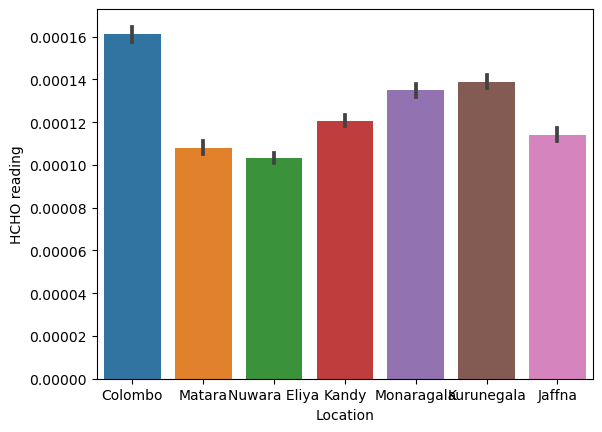

In [317]:
sns.barplot(data=df, x='Location', y='HCHO reading')

<Axes: xlabel='HCHO reading', ylabel='Count'>

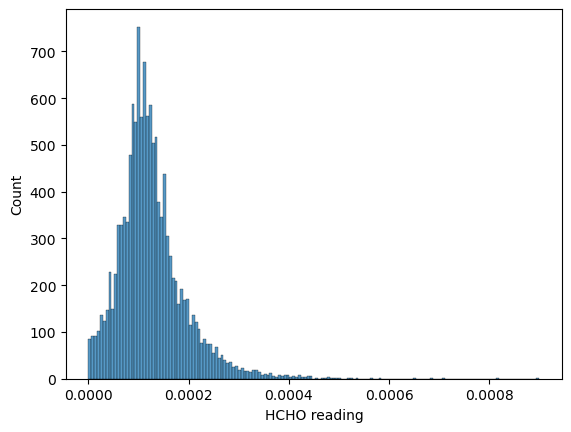

In [318]:
sns.histplot(data=df, x='HCHO reading')

<Axes: xlabel='Current_date', ylabel='HCHO reading'>

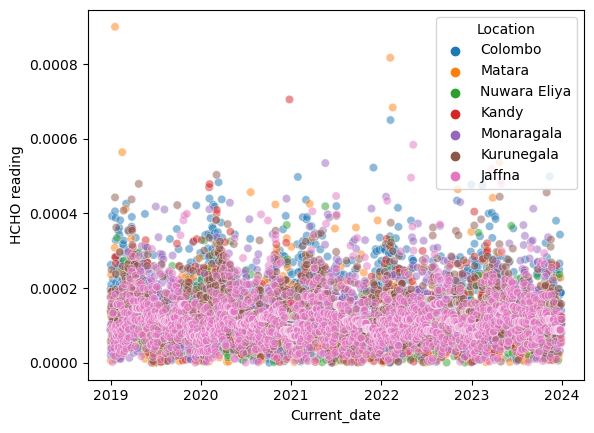

In [319]:
sns.scatterplot(data=df, x='Current_date', y='HCHO reading', hue='Location', alpha=0.5)

In [269]:

# Convert the "time" column to datetime format


# Filter the DataFrame to include only rows with dates after December 31, 2018
weather_df = weather_df[(weather_df["time"] > '2018-12-31') & (weather_df["city"] == "Colombo")]
weather_df = weather_df.reset_index(drop=True)

print(weather_df.head())
print(weather_df["city"].describe())
print(colombo_df.count())

KeyError: 'time'

In [322]:
columns_to_import = ['NAME', 'ELEVATION', 'DATE', 'PRCP', 'TAVG']
custom_column_names = ['Location', 'Elevation', 'Current_date', 'Precipitation', 'Temperature_average']
weather_df = pd.read_csv("3612007.csv", usecols=columns_to_import)
weather_df.columns = custom_column_names
weather_df["Current_date"] = pd.to_datetime(weather_df["Current_date"])
print(weather_df.isna().sum())
weather_df.loc[weather_df["Location"] == "COLOMBO, CE", "Location"] = "Colombo"
weather_df.loc[weather_df["Location"] == "NUWARA ELIYA, CE","Location"] = "Nuwara Eliya"
weather_df.loc[weather_df["Location"] == "KURUNEGALA, CE","Location"] = "Kurunegala"

Location                0
Elevation               0
Current_date            0
Precipitation          17
Temperature_average     0
dtype: int64


In [323]:
# Merging weather data with existing data based on location and date
weather_locations = weather_df["Location"].unique()
dfs = []
for location in weather_locations:
    merged_df = pd.merge(df[df["Location"] == location], weather_df[weather_df["Location"] == location], on='Current_date', how='left')    
    dfs.append(merged_df)
complete_df = pd.concat(dfs, ignore_index=True)
complete_df.drop(columns=['Location_y'], inplace=True)
complete_df.rename(columns={'Location_x': 'Location'}, inplace=True)
na_counts = complete_df.isna().sum()
print(na_counts)
print(complete_df[complete_df["Location"] == "Colombo"].count())

HCHO reading             0
Location                 0
Current_date             0
Next_date                0
Elevation              248
Precipitation          265
Temperature_average    248
dtype: int64
HCHO reading           1826
Location               1826
Current_date           1826
Next_date              1826
Elevation              1765
Precipitation          1756
Temperature_average    1765
dtype: int64


In [ ]:
# Generating date ranges for different locations
date_range = pd.date_range(start="2019-01-01", end="2023-12-31", freq='D')  # 'D' for daily frequency
date_range_2 = pd.date_range(start="2019-01-02", end="2024-01-01", freq='D')

# Add a new column 'full_date_range' to the DataFrame
colombo_df = df[df["Location"] == "Colombo Proper"]
colombo_df.loc[:,"Location"] = "Colombo"
print(colombo_df.head())
colombo_df.loc[:, 'Current_date'] = date_range[:len(colombo_df)]
print(colombo_df.loc[1820:1825, :])

The final data is printed and exported.

In [ ]:
matara_df = df[df["Location"] == "Deniyaya, Matara"]
matara_df = matara_df.reset_index(drop=True)
matara_df.loc[:,"Location"] = "Matara"
print(matara_df.head())
matara_df.loc[:, 'Current_date'] = date_range[:len(matara_df)]
print(matara_df.loc[1820:1825, :])

In [ ]:
Nuwaraeliya_df = df[df["Location"] == "Nuwara Eliya Proper"]
Nuwaraeliya_df = Nuwaraeliya_df.reset_index(drop=True)
Nuwaraeliya_df.loc[:,"Location"] = "Nuwara Eliya"
print(Nuwaraeliya_df.head())
Nuwaraeliya_df.loc[:, 'Current_date'] = date_range[:len(Nuwaraeliya_df)]
print(Nuwaraeliya_df.loc[1820:1825, :])

In [ ]:
kandy_df = df[df["Location"] == "Kandy Proper"]
kandy_df = kandy_df.reset_index(drop=True)
kandy_df.loc[:,"Location"] = "Kandy"
print(kandy_df.head())
kandy_df.loc[:, 'Current_date'] = date_range[:len(kandy_df)]
print(kandy_df.loc[1820:1825, :])

In [ ]:
bibile_df = df[df["Location"] == "Bibile, Monaragala"]
bibile_df = bibile_df.reset_index(drop=True)
bibile_df.loc[:,"Location"] = "Monaragala"
print(bibile_df.head())
bibile_df.loc[:, 'Current_date'] = date_range[:len(bibile_df)]
print(bibile_df.loc[1820:1825, :])

In [46]:
kurunegala_df = df[df["Location"] == "Kurunegala Proper"]
kurunegala_df = kurunegala_df.reset_index(drop=True)
kurunegala_df.loc[:,"Location"] = "Kurunegala"
print(kurunegala_df.head())
kurunegala_df.loc[:, 'Current_date'] = date_range[:len(kurunegala_df)]
print(kurunegala_df.loc[1820:1825, :])

   HCHO reading    Location Current_date   Next_date
0      0.000088  Kurunegala   2019-01-01  2019-01-02
1      0.000137  Kurunegala   2019-01-02  2019-01-03
2      0.000148  Kurunegala   2019-01-03  2019-01-04
3     -0.000002  Kurunegala   2019-01-04  2019-01-05
4      0.000249  Kurunegala   2019-01-05  2019-01-06
      HCHO reading    Location         Current_date   Next_date
1820      0.000152  Kurunegala  2023-12-26 00:00:00  2023-12-27
1821      0.000075  Kurunegala  2023-12-27 00:00:00  2023-12-28
1822           NaN  Kurunegala  2023-12-28 00:00:00  2023-12-29
1823           NaN  Kurunegala  2023-12-29 00:00:00  2023-12-30
1824      0.000158  Kurunegala  2023-12-30 00:00:00  2023-12-31
1825           NaN  Kurunegala  2023-12-31 00:00:00  2024-01-01


In [47]:
jaffna_df = df[df["Location"] == "Jaffna Proper"]
jaffna_df = jaffna_df.reset_index(drop=True)
jaffna_df.loc[:,"Location"] = "Jaffna"
print(jaffna_df.head())
jaffna_df.loc[:, 'Current_date'] = date_range[:len(jaffna_df)]
print(jaffna_df.loc[1820:1825, :])

   HCHO reading Location Current_date   Next_date
0      0.000058   Jaffna   2019-01-01  2019-01-02
1      0.000102   Jaffna   2019-01-02  2019-01-03
2      0.000039   Jaffna   2019-01-03  2019-01-04
3     -0.000002   Jaffna   2019-01-04  2019-01-05
4      0.000159   Jaffna   2019-01-05  2019-01-06
      HCHO reading Location         Current_date   Next_date
1820 -7.696313e-08   Jaffna  2023-12-26 00:00:00  2023-12-27
1821           NaN   Jaffna  2023-12-27 00:00:00  2023-12-28
1822  5.139770e-05   Jaffna  2023-12-28 00:00:00  2023-12-29
1823  1.267235e-04   Jaffna  2023-12-29 00:00:00  2023-12-30
1824  1.166590e-04   Jaffna  2023-12-30 00:00:00  2023-12-31
1825  6.540853e-05   Jaffna  2023-12-31 00:00:00  2024-01-01


In [49]:
df = pd.read_csv('kan_output.csv', names = column_names)
print(df.head())
print(df.loc[1820:1825, :])

   HCHO reading      Location Current_date   Next_date
0      0.000176  Kandy Proper   2019-01-01  2019-01-02
1      0.000092  Kandy Proper   2019-01-02  2019-01-03
2           NaN  Kandy Proper   2019-01-03  2019-01-04
3      0.000191  Kandy Proper   2019-01-04  2019-01-05
4      0.000122  Kandy Proper   2019-01-05  2019-01-06
      HCHO reading      Location Current_date   Next_date
1820           NaN  Kandy Proper   2023-12-26  2023-12-27
1821           NaN  Kandy Proper   2023-12-27  2023-12-28
1822           NaN  Kandy Proper   2023-12-28  2023-12-29
1823           NaN  Kandy Proper   2023-12-29  2023-12-30
1824      0.000056  Kandy Proper   2023-12-30  2023-12-31
1825           NaN  Kandy Proper   2023-12-31  2024-01-01
